# Project Details

Our friend has has taken a first crack at a CSV file containing Netflix data. For their first order of business, they have been performing some analyses, and they believe that `the average duration of movies has been declining`.

As evidence of this, they have provided us with the following information. 
> For the years from 2011 to 2020, the average movie durations are 103, 101, 99, 100, 100, 95, 95, 96, 93, and 90, respectively.
<p><img src="https://assets.datacamp.com/production/project_1237/img/netflix.jpg" alt="Someone's feet on table facing a television"></p>


# Data Analysis Framework


| <img src="Data_analysis_process.png" width=700/> | 
|:--:| 
| The Framework I use on my data analysis process. |

# Ask

`Our Business Task`
> **Is it true that the average duration of ``movies`` has been declining over time?**


# Prepare

First, we need to create a `dictionary` to put the data our friend give us in.

In [1]:
years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]

movie_dict = {'years': years,
              'durations': durations}

movie_dict

{'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}

Now, we will create `a pandas dataframe` - the most common way to work with tabular data in Python - from this dictionary

In [2]:
import pandas as pd

movie_df = pd.DataFrame(movie_dict)

movie_df

,years,durations
0,2011,103
1,2012,101
2,2013,99
3,2014,100
4,2015,100
5,2016,95
6,2017,95
7,2018,96
8,2019,93
9,2020,90


# Process

# Analyze

Now back to the task at hand. We want to follow up on our friend's assertion that movie lengths have been decreasing over time. 

A great place to start will be a visualization of the data.

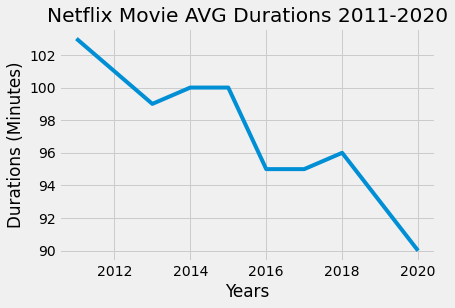

In [78]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.figure()

years = movie_df['years']
durations = movie_df['durations']

plt.plot(years, durations)
plt.xlabel('Years')
plt.ylabel('Durations (Minutes)')
plt.title('Netflix Movie AVG Durations 2011-2020')

plt.show()



### Working with the original CSV

As We can see from this plot that the average duration of movies declines over time But equipped only with our friend's aggregations, we're limited in the further explorations we can perform. There are a few questions about this trend that we are currently unable to answer, including:

- What does this trend look like over a longer period of time?
- Is this explainable by something like the genre of entertainment?

So we asked our friend for the original CSV they used to perform their analyses.

In [79]:
netflix_df = pd.read_csv('netflix_data.csv')

netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,111,A scrappy but poor boy worms his way into a ty...,Dramas
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,44,"In this documentary, South African rapper Nast...",Documentaries
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,1,Dessert wizard Adriano Zumbo looks for the nex...,International TV


### 5. Filtering for movies!
We are looking for the avg duration of movies so we need to filter our data.

In [80]:
netflix_df[['type', 'duration']]

,type,duration
0,TV Show,4
1,Movie,93
2,Movie,78
3,Movie,80
4,Movie,123
...,...,...
7782,Movie,99
7783,Movie,111
7784,Movie,44
7785,TV Show,1


In [81]:
netflix_movies = netflix_df[netflix_df['type'] == 'Movie']
netflix_movies

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies
...,...,...,...,...,...,...,...,...,...,...,...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,88,"Dragged from civilian life, a former superhero...",Children
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,111,A scrappy but poor boy worms his way into a ty...,Dramas
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,44,"In this documentary, South African rapper Nast...",Documentaries


In [82]:
# Select only the columns of interest
netflix_movies_sub = netflix_movies[['title', 'country', 'genre', 'release_year', 'duration']]

netflix_movies_sub.head()

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


### Visualizing durations over years
This time, we are no longer working with aggregates but instead with individual movies. A line plot is no longer a good choice for our data, so let's try a scatter plot instead. We will again plot the year of release on the x-axis and the movie duration on the y-axis.

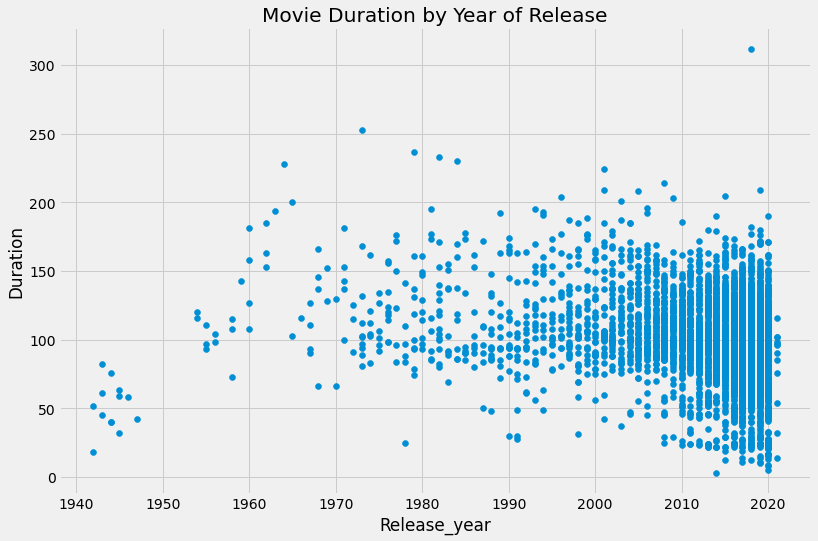

In [83]:
fig = plt.figure(figsize=(12, 8))

release_year = netflix_movies_sub['release_year']
duration = netflix_movies_sub['duration']

plt.scatter(release_year, duration)

plt.xlabel('Release_year')
plt.ylabel('Duration')
plt.title('Movie Duration by Year of Release')

plt.show()

### Digging deeper
We can see from the scatter plot that Some of these films are under an hour long! 

> Let's filter our DataFrame for movies with a <code>duration</code> under 60 minutes and look at the genres. This might give us some insight into what is dragging down the average.</p>

In [84]:
movies_under_60 = netflix_movies_sub[netflix_movies_sub['duration'] < 60]

movies_under_60.head(20)

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28
162,A Christmas Special: Miraculous: Tales of Lady...,France,Uncategorized,2016,22
171,A Family Reunion Christmas,United States,Uncategorized,2019,29
177,A Go! Go! Cory Carson Christmas,United States,Children,2020,22
178,A Go! Go! Cory Carson Halloween,NaN,Children,2020,22
179,A Go! Go! Cory Carson Summer Camp,NaN,Children,2020,21


### Marking non-feature films
Interesting! It looks as though many of the films that are under 60 minutes fall into genres such as "Children", "Stand-Up", and "Documentaries". This is a logical result, as these types of films are probably often shorter than 90 minute Hollywood blockbuster. 

> We could eliminate these rows from our DataFrame and plot the values again. But another interesting way to explore the effect of these genres on our data would be to plot them, but mark them with a different color.

<p>In Python, there are many ways to do this, but one fun way might be to use a loop to generate a list of colors based on the contents of the <code>genre</code> column. Much as we did in Intermediate Python, we can then pass this list to our plotting function in a later step to color all non-typical genres in a different color!</p>

In [85]:
# Define an empty list
colors = []
    
for lab, row in netflix_movies_sub.iterrows() :
    if row['genre'] == "Children" :
        colors.append('red')
    elif row['genre'] == "Documentaries" :
        colors.append('blue')
    elif row['genre'] == "Stand-Up" :
        colors.append('green')
    else:
        colors.append('black')
        
# Inspect the first 10 values in your list        
colors[0:10]

['black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'blue']

### Plotting with color!
We now have a <code>colors</code> list that we can pass to our scatter plot, which should allow us to ``visually inspect whether these genres might be responsible for the decline in the average duration of movies.``


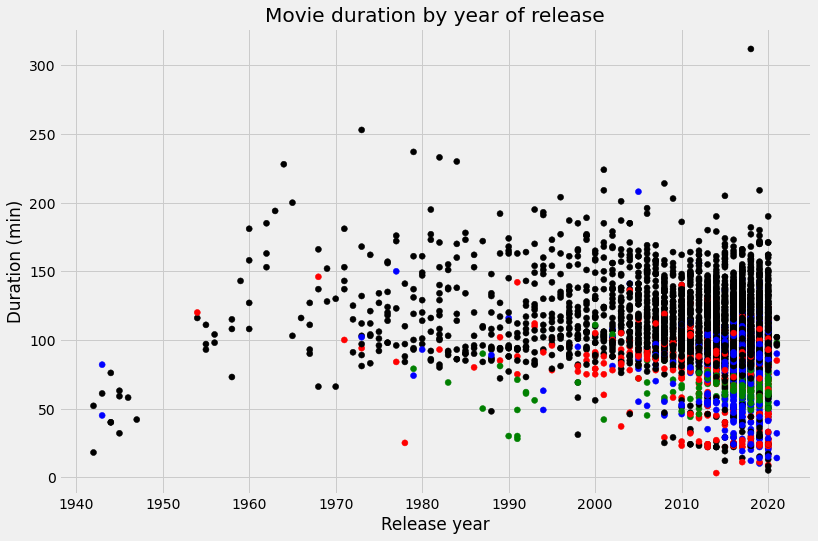

In [86]:
fig = plt.figure(figsize=(12,8))

plt.scatter(x=release_year, y=duration, c = colors)

# Create a title and axis labels
plt.xlabel("Release year")
plt.ylabel("Duration (min)")
plt.title("Movie duration by year of release")

plt.show()

# Share
Well, as we can see, non-typical genres such as children's movies and documentaries are all clustered around the bottom half of the plot. 
> But we can't know for certain until we perform additional analyses.

# Act